# Newton Examples

This notebook is to study the behavior of the function to root-find with Newton.
We use this to motivate our design for the optimal optimizer.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pyglstudy as gl

In [3]:
def phi(x, L, v, l1, l2):
    return np.sum(v ** 2 / ((L + l2) * x + l1) ** 2) - 1
    
vphi = np.vectorize(phi, excluded=[1,2,3,4])

In [41]:
def h_max(L, v, l1, l2):
    L = L + l2
    L_nzn = L > 1e-10
    numer = np.sum(np.where(L_nzn, (v / np.maximum(L, 1e-10)) ** 2, 0))
    denom = 1 - np.sum(np.where(L_nzn, 0, v ** 2)) / (l1 * l1)
    print(denom)
    return np.sqrt(numer / denom)
    
def h_max_taylor(L, v, l1, l2):
    L = L + l2
    l1_2 = l1 * l1
    l1_3 = l1_2 * l1
    l1_4 = l1_3 * l1
    v_square = v ** 2
    v_square_L = v_square * L
    c = np.sum(v_square) / l1_2
    b = -2 * np.sum(v_square_L) / l1_3
    a = 3 * np.sum(v_square_L * L) / l1_4
    discr = np.maximum(b * b - 4 * a * c, 0) 
    return np.maximum(-b - np.sqrt(discr) / (2 * a), 0)


In [49]:
np.random.seed(0)
x = np.linspace(0, 10, 100)
p = 100
L = np.concatenate(
    [np.zeros(10), np.random.uniform(0.8, 2, p)],
)
v = np.random.normal(0, 1, len(L))
l1 = 1
l2 = 0.0

print(np.linalg.norm(v, ord=1))

h_max(L, v, l1, l2), h_max_taylor(L, v, l1, l2), np.linalg.norm(gl.newton_abs_solver(L, v, l1, l2, 1e-10, 1000)['beta'])

96.50084181972582
-13.235512887430586


/var/folders/8w/87ph5tkx60vc7f4l87071knc0000gn/T/ipykernel_14799/2676960733.py:7: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(numer / denom)


(nan, 291.06689356137866, nan)

In [4]:
def assess(L, v, l1, l2, tol=1e-8, max_iters=int(1000), smart_init=True):
    out_nsd = gl.newton_solver_debug(
        L, v, l1, l2, tol, max_iters, smart_init
    )
    h_min = out_nsd['h_min']
    iters = out_nsd['iters']
    smart_iters = out_nsd['smart_iters']


In [3]:
assess.1 <- function(L, v, l1, l2, tol=1e-8, max.iters=1000, smart_init=TRUE)
{
    out.nsd <- newton_solver_debug(L, v, l1, l2, tol, max.iters, smart_init=smart_init)
    h.min <- out.nsd$h_min
    #h.max <- out.nsd$h_max
    iters <- out.nsd$iters
    smart.iters <- out.nsd$smart_iters
    
    if (sum(out.nsd$beta != 0) == 0) {
        stop("True solution is 0.")
    }
    
    f.min <- f_(h.min, L, v, l1, l2)
    #if (!is.infinite(h.max)) {
    #    f.max <- f_(h.max, L, v, l1, l2)        
    #}
    if (length(iters) > 0) {
        f.iters <- f(iters, L, v, l1, l2)
    }
    hs.max <- ifelse(length(iters) == 0, 1, 2 * max(iters))
    #hs.max <- ifelse(is.infinite(h.max), hs.max, 2 * h.max)
    hs.max <- max(ifelse(length(smart.iters) == 0, 1, 2 * max(smart.iters)), hs.max)
    hs <- seq(0, hs.max, length.out=1000)
    fs <- f(hs, L, v, l1, l2)

    df.f.plot.1 <- data.frame(x=hs, y=fs)
    f.plot.1.title <- TeX(paste(
        "Objective (p=", p, 
        ", $\\lambda_{\\max}$=", round(max(L),2), 
        ", smart_init=", smart_init, 
        ", n_iters=", length(out.nsd$iters), 
        ", smart_iters=", length(out.nsd$smart_iters), 
        ")", 
        sep='')
    )
    f.plot.1 <- ggplot(df.f.plot.1, aes(x=x, y=y)) +
        geom_line() +
        geom_hline(yintercept=0, linetype='dashed', color='red') +
        geom_point(data=data.frame(x=h.min, y=f.min), aes(x=x, y=y), color='red', shape=17) +
        ggtitle(f.plot.1.title) +
        xlab("h") +
        ylab("f")

    #if (!is.infinite(h.max)) {
    #    f.plot.1 <- f.plot.1 + geom_point(data=data.frame(x=h.max, y=f.max), aes(x=x, y=y), color='red', shape=17)
    #}

    if (length(iters) > 0) {
        f.plot.1 <- f.plot.1 + geom_point(data=data.frame(x=iters, y=f.iters), mapping=aes(x=x, y=y), color='blue')
    }
    
    f.smart.iters <- f(smart.iters, L, v, l1, l2)
    if (length(smart.iters) > 0) {
        f.plot.1 <- f.plot.1 + geom_point(data=data.frame(x=smart.iters, y=f.smart.iters), mapping=aes(x=x,y=y), color='cyan')
    }
        
    list(
        plot=f.plot.1,
        out.nsd=out.nsd
    )
}

assess <- function(L, v, l1, l2, tol=1e-8, max.iters=1000) 
{
    out.smart <- assess.1(L, v, l1, l2, tol, max.iters, TRUE)
    out.dumb <- assess.1(L, v, l1, l2, tol, max.iters, FALSE) 
    plt <- arrangeGrob(out.smart$plot, out.dumb$plot, nrow=2)
    plot(plt)
    list(
        smart.nsd=out.smart$out.nsd,
        dumb.nsd=out.dumb$out.nsd
    )
}

In [214]:
p <- 100
eval.max <- 10
seed <- 123
set.seed(seed)
#L <- c(runif(p-5, 0.4, 0.5), runif(5, 0.8*eval.max, eval.max))
#L <- c(0, runif(p-5, 0, 0.1), runif(4, 0.8, eval.max))
#L <- c(rep(0, 10), rep(1e-10, 10), runif(p-30, 0, 0.1), runif(10, 0.8, eval.max))
#L <- c(rep(0, 10), rep(1e-10, 10), runif(p-30, 0, 1e-4), runif(10, 0.8, eval.max))
d <- as.integer(0.8 * p); L <- c(rep(1e-10, p-d), runif(d, 0.8, eval.max))
#L <- rchisq(p, eval.max)
v <- rnorm(p, sd=sqrt(L))
#v <- rnorm(p, sd=1)
alpha <- 1
lmda <- 1e-2
l1 <- alpha * lmda
l2 <- (1-alpha) * lmda

In [215]:
summary(L)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.560   4.313   4.331   7.159   9.947 

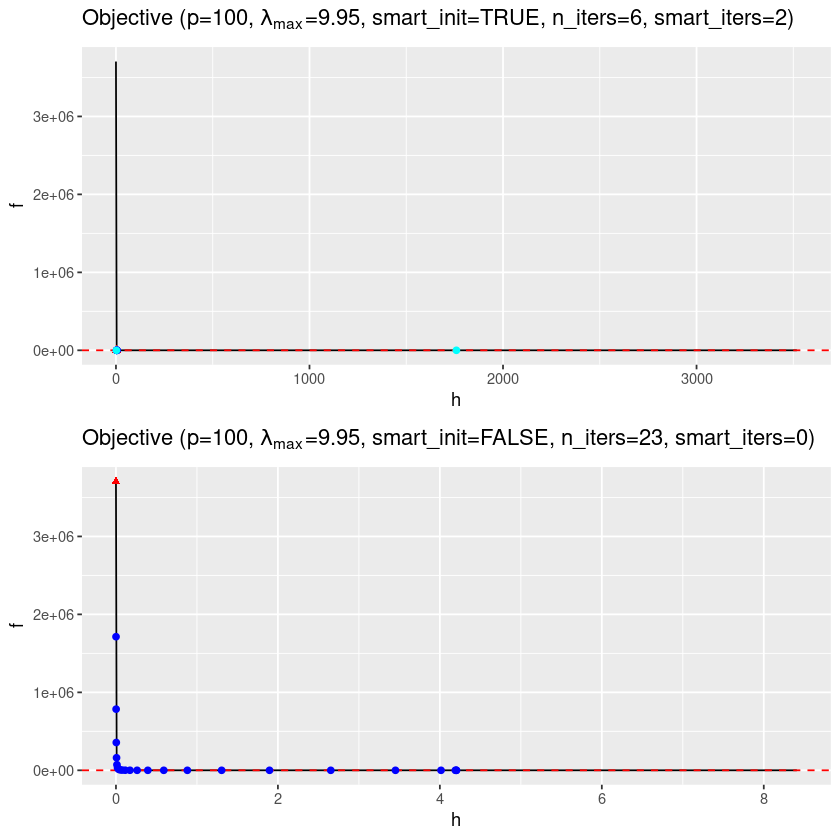

In [217]:
out.1 <- assess(L, v, l1, l2)

In [218]:
out.1

$smart.nsd
$smart.nsd$beta
  [1] -0.0029206102 -0.0008741028 -0.0053198392  0.0091184845  0.0050783801
  [6] -0.0047216488 -0.0016937638 -0.0019618608  0.0032790430 -0.0003504910
 [11]  0.0010649736 -0.0001200131 -0.0001802312  0.0057537262 -0.0009491614
 [16]  0.0063753778 -0.0065110951  0.0024577684  0.0005206943  0.0009078376
 [21]  0.2043770438 -0.1769670131 -0.1559131159 -0.3408815423 -0.3485236045
 [26]  0.2743657879  0.1883412466  0.0176533577  0.3804026755  0.9163114732
 [31] -0.1584167300 -1.0352381533  0.3790948366 -0.2877849456 -0.5198380079
 [36]  0.3402888367 -0.1625612068 -1.1182270668  0.0927431530 -0.0448592687
 [41]  0.0019226219  0.1437998956 -0.1432260337  0.2042601632 -0.0843220874
 [46]  0.1226030259  0.4550390114  0.1737827631 -0.1750947177  0.7819894861
 [51]  0.3195788624  0.1817328271  0.0892229324 -0.2203103512  1.3399047511
 [56] -0.2632190612  0.7840665867  0.9166121149 -0.1220079209 -0.5990573970
 [61] -0.4880796104  0.1195314266 -0.1148831250 -0.1696210524 -0.6405263415
 [66] -0.0312077909 -0.4570918756 -0.7391851576 -0.2108563486  0.3116268316
 [71] -0.5195319065  0.2754101410 -0.5665504701 -0.0400334617  0.2126597425
 [76]  0.1831117746  0.0751377847 -0.2303686057 -0.2826203549 -0.4967861784
 [81]  0.0447101937 -0.7315817965 -0.2355489529 -0.1403568676  0.6400351938
 [86] -0.2935904559  0.0819146044  0.0270953274 -0.3376971850 -0.0323752958
 [91]  0.5190343107  0.1758330868  0.0152209708 -0.4692925680 -0.9023479264
 [96]  0.6725276326 -0.7044593136  0.2915292128  0.9496618117 -1.0681721967

$smart.nsd$h_min
[1] 2.451919

$smart.nsd$h_max
[1] 420003.6

$smart.nsd$iters
[1] 3.292013 3.928992 4.177702 4.203842 4.204089 4.204089

$smart.nsd$smart_iters
[1] 1759.093642    2.482819


$dumb.nsd
$dumb.nsd$beta
  [1] -0.0029206102 -0.0008741028 -0.0053198392  0.0091184845  0.0050783801
  [6] -0.0047216488 -0.0016937638 -0.0019618608  0.0032790430 -0.0003504910
 [11]  0.0010649736 -0.0001200131 -0.0001802312  0.0057537262 -0.0009491614
 [16]  0.0063753778 -0.0065110951  0.0024577684  0.0005206943  0.0009078376
 [21]  0.2043770438 -0.1769670131 -0.1559131159 -0.3408815423 -0.3485236045
 [26]  0.2743657879  0.1883412466  0.0176533577  0.3804026755  0.9163114732
 [31] -0.1584167300 -1.0352381533  0.3790948366 -0.2877849456 -0.5198380079
 [36]  0.3402888367 -0.1625612068 -1.1182270668  0.0927431530 -0.0448592687
 [41]  0.0019226219  0.1437998956 -0.1432260337  0.2042601632 -0.0843220874
 [46]  0.1226030259  0.4550390114  0.1737827631 -0.1750947177  0.7819894861
 [51]  0.3195788624  0.1817328271  0.0892229324 -0.2203103512  1.3399047511
 [56] -0.2632190612  0.7840665867  0.9166121149 -0.1220079209 -0.5990573970
 [61] -0.4880796104  0.1195314266 -0.1148831250 -0.1696210524 -0.6405263415
 [66] -0.0312077909 -0.4570918756 -0.7391851576 -0.2108563486  0.3116268316
 [71] -0.5195319065  0.2754101410 -0.5665504701 -0.0400334617  0.2126597425
 [76]  0.1831117746  0.0751377847 -0.2303686057 -0.2826203549 -0.4967861784
 [81]  0.0447101937 -0.7315817965 -0.2355489529 -0.1403568676  0.6400351938
 [86] -0.2935904559  0.0819146044  0.0270953274 -0.3376971850 -0.0323752958
 [91]  0.5190343107  0.1758330868  0.0152209708 -0.4692925680 -0.9023479264
 [96]  0.6725276326 -0.7044593136  0.2915292128  0.9496618117 -1.0681721967

$dumb.nsd$h_min
[1] 0

$dumb.nsd$h_max
[1] Inf

$dumb.nsd$iters
 [1] 0.0007687341 0.0020290266 0.0040480369 0.0072267832 0.0121602448
 [6] 0.0197260490 0.0312242792 0.0485944324 0.0747420353 0.1140236130
[11] 0.1729628857 0.2612960400 0.3934482355 0.5904461079 0.8817932132
[16] 1.3051233382 1.8963896568 2.6528377705 3.4517440513 4.0143572698
[21] 4.1914509392 4.2040325791 4.2040894564

$dumb.nsd$smart_iters
numeric(0)

In [221]:
log(out.1$smart.nsd$h_max - out.1$smart.nsd$h_min)

[1] 12.94801